## Map of MLD

This notebook plots monthly mean mixed layer depth for each month.

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(os.environ['GOTMWORK_ROOT']+'/tools', )
from gotmanalysis import GOTMMap, plot_forcing_regime_map
np.seterr(all='raise')
%matplotlib inline

In [2]:
casename = 'JRA55-do_Global_dampV5d_3h'
turbmethod = 'KPP-CVMix'
diagname = 'mld_deltaR_mean'
fig_root = os.environ['GOTMFIG_ROOT']+'/'+casename+'/diagnostics'

In [3]:
# check time tag
month_labels = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',\
                'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
timetag_list = ['20090101-20090131',
                '20090201-20090228',
                '20090301-20090331',
                '20090401-20090430',
                '20090501-20090531',
                '20080601-20080630',
                '20080701-20080731',
                '20080801-20080831',
                '20080901-20080930',
                '20081001-20081031',
                '20081101-20081130',
                '20081201-20081231']

### Read data

In [4]:
# read data
mon_gmobj = []
for j in np.arange(12):
    timetag = timetag_list[j]
    s1data_root = os.environ['GOTMRUN_ROOT']+'/'+casename+'/VR1m_DT600s_'+timetag
    s2data_root = os.environ['GOTMFIG_ROOT']+'/data/'+casename+'/VR1m_DT600s_'+timetag
    os.makedirs(s2data_root, exist_ok=True)
    os.makedirs(fig_root, exist_ok=True)
    # get forcing regime
    basepath = s1data_root+'/'+turbmethod
    s2data_name = s2data_root+'/data_map_'+diagname+ \
                  '_'+turbmethod+'.npz'
    # read data
    gmobj = GOTMMap().load(s2data_name)
    # append to list
    mon_gmobj.append(gmobj)

### Figure

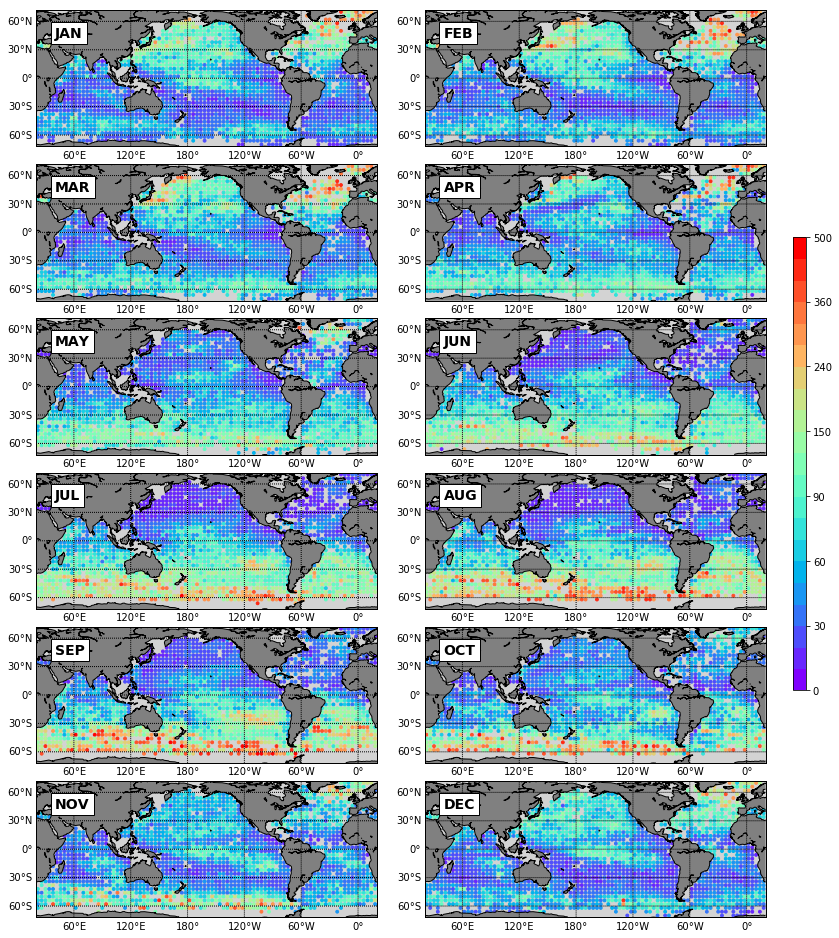

In [5]:
# plot figure
nrow = 6
fig_width = 12
fig_height = 13

# plot figure
height_ratios = [1]*nrow
height_ratios.append(0.15)
width_ratios = [1, 1, 0.05]
f, axarr = plt.subplots(nrow, 2, sharex='col')
f.set_size_inches(fig_width, fig_height)

# plot
levels0 = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 110, 130, \
           150, 180, 210, 240, 280, 320, 360, 407, 454, 500]
for j in np.arange(12):
    m = j//2
    n = j%2
    mlabel = month_labels[j]
    im0 = mon_gmobj[j].plot(axis=axarr[m,n], levels=levels0, add_colorbar=False)
    # label
    axarr[m,n].text(40, 55, mlabel, fontsize=14, color='k', fontweight='bold', va='top',
                    bbox=dict(boxstyle="square",ec='k',fc='w'))

# reduce margin
plt.tight_layout()

# colorbar
cb_ticks = [0, 30, 60, 90, 150, 240, 360, 500]
plt.subplots_adjust(right=0.95)
cax0 = plt.axes([0.85, 0.15, 0.1, 0.7])
cax0.set_visible(False)
cb0 = plt.colorbar(im0, ax=cax0, ticks=cb_ticks, aspect=35)

# save figure
figname = fig_root+'/fig_'+diagname+'_'+turbmethod+'.png'
plt.savefig(figname, dpi = 300)